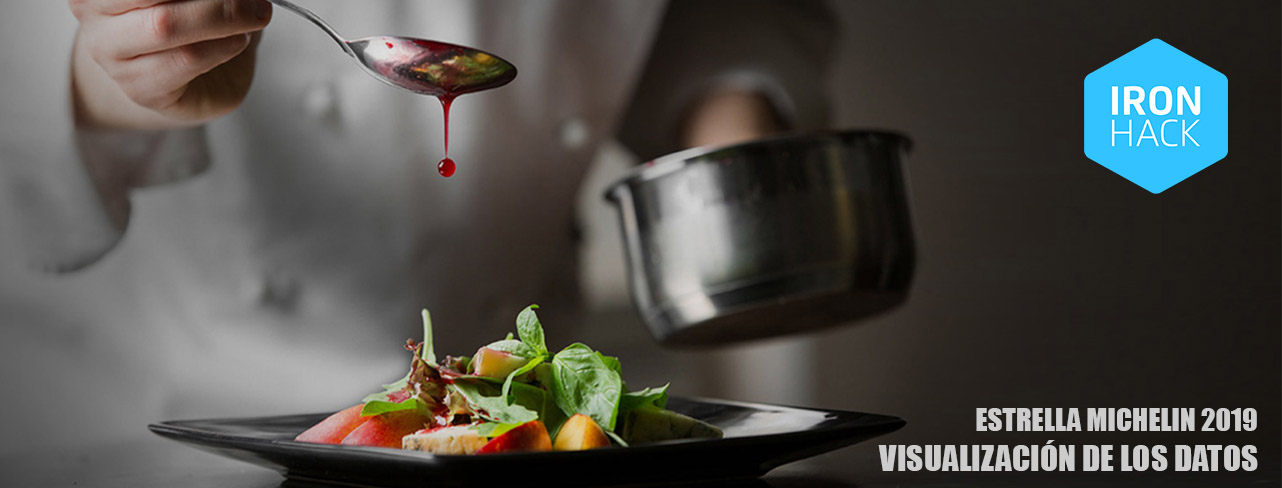

In [141]:
import sys
sys.path.append("../")

In [252]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pycountry
import plotly.graph_objects as go
import plotly.express as px

In [52]:
data = pd.read_csv('../data/estrellasMichelin.csv', index_col = 0)

In [316]:
data.head(4)

,name,year,latitude,longitude,city,region,zipCode,cuisine,price,url,media_precios_€,phone,restaurant_web,horarios
0,Amador,2019,48.25406,16.35915,Wien,Austria,1190,Creative,$$$$$,https://guide.michelin.com/at/en/vienna/wien/r...,175.00,+43 660 9070500,www.restaurant-amador.com,"Closed: Monday, Tuesday, Sunday"
1,Manresa,2019,37.22761,-121.98071,South San Francisco,California,95030,Contemporary,$$$$,https://guide.michelin.com/us/en/california/so...,231.00,+1 408-354-4330,www.manresarestaurant.com,"Closed: Monday, Tuesday, lunch : Wednesday-Sunday"
2,Benu,2019,37.78521,-122.39876,San Francisco,California,94105,Asian,$$$$,https://guide.michelin.com/us/en/california/sa...,273.00,+1 415-685-4860,www.benusf.com,"Closed: Monday, lunch : Tuesday-Saturday, Sunday"
3,Quince,2019,37.79762,-122.40337,San Francisco,California,94133,Contemporary,$$$$,https://guide.michelin.com/us/en/california/sa...,207.06,+1 415-775-8500,www.quincerestaurant.com,"Closed: Monday, lunch : Tuesday-Saturday, Sunday"


#### Sacamos la media y la mediana del precio en euros.

In [32]:
media_precios_global = round (data['media_precios_€'].mean(), 2)
media_precios_global

203.87

In [29]:
mediana_precios_global = round (data['media_precios_€'].median(), 2)
mediana_precios_global

182.74

#### Hacemos los mismo, pero descartando aquellos restaurantes de los que no tenemos información del precio, dado que nos estaba generando ruido innecesario en los resultados puesto que el precio no es cero, tan solo no lo sabemos.

In [35]:
valores = data['media_precios_€'] > 0

In [42]:
media_precios_total = round (data['media_precios_€'][valores].mean(), 2)
media_precios_total

222.4

In [45]:
mediana_precios_total = round (data['media_precios_€'][valores].median(), 2)
mediana_precios_total

191.4

### Vamos a mostrar qué restaurantes están por encima de la media en cuanto a precio y cuáles por debajo.

####  Recordemos que aunque no los hayamos tenido en cuenta a la hora de hacer la media si que mostramos aquellos restaurantes de los que no tenemos información.

In [365]:
fig_res = px.bar(data, x = 'name', y = 'media_precios_€', color = 'media_precios_€')
#ax.axhline(y=10, color="g", label="Una línea verde")

#x0 = data["name"].iloc[0]
#x1 = data["name"].iloc[-1]
#xm = data["name"].iloc[len(data)//2]

fig_res.add_shape(type="line",
    x0= -0.8, y0 = mediana_precios_total, x1 = 35.8, y1 = mediana_precios_total,
    line=dict(color="Red",width=2)
 )
fig_res.add_annotation(x='Sushi Shikon', y = 450,
            text = 'Precio medio = 191.4',
            showarrow=False,
            yshift=10)
fig_res.show()

#### Hacemos la media y la mediana atendiendo a la ciudad

In [75]:
precio_ciudad = data['media_precios_€'].groupby(data['city'])


In [85]:
precio_ciudad.median().round(2)

city
Bray                   272.55
Chelsea                155.25
Chicago                241.50
Hong Kong              163.79
København              364.00
Macau                  187.00
Mayfair                 73.31
New York               298.20
Oslo                     0.00
San Francisco          261.66
Seoul                  140.44
South San Francisco    231.00
Stockholm              343.00
Taipei                 105.00
Washington, D.C.       199.92
Wien                   175.00
Name: media_precios_€, dtype: float64

In [74]:
precio_ciudad.mean().round(2)

city
Bray                   272.55
Chelsea                155.25
Chicago                241.50
Hong Kong              174.61
København              364.00
Macau                  183.11
Mayfair                 73.31
New York               287.36
Oslo                     0.00
San Francisco          223.93
Seoul                  140.44
South San Francisco    231.00
Stockholm              343.00
Taipei                 105.00
Washington, D.C.       199.92
Wien                   175.00
Name: media_precios_€, dtype: float64

In [269]:
media_por_ciudades = pd.DataFrame(precio_ciudad.mean().round(2))

In [274]:
media_por_ciudades.value_counts()

region          media_precios_€  latitude  longitude
Washington DC   199.92           38.71     -78.16       1
United Kingdom  169.39           51.50     -0.37        1
Taipei          105.00           25.05      121.52      1
Sweden          343.00           59.33      18.06       1
South Korea     140.44           37.54      127.02      1
Norway          0.00             59.91      10.76       1
New York City   287.36           40.75     -73.98       1
Macau           183.11           22.18      113.55      1
Hong Kong       174.61           22.28      114.16      1
Denmark         364.00           55.70      12.57       1
Chicago         241.50           41.91     -87.65       1
California      224.94           38.02     -122.42      1
Austria         175.00           48.25      16.36       1
dtype: int64

#### Observamos si el precio medio depende de la localización del restaurante

In [366]:
fig_loc = px.bar(media_por_ciudades, x = 'region', y = 'media_precios_€', color = 'media_precios_€')
#ax.axhline(y=10, color="g", label="Una línea verde")

fig_loc.add_shape(type="line",
    x0= -0.6, y0 = mediana_precios_total, x1 = 12.6, y1 = mediana_precios_total,
    line=dict(color="Red",width=2)
 )
fig_loc.add_annotation(x='region', y = 350,
            text = 'Precio medio = 191.4',
            showarrow=False,
            yshift=10)
fig_loc.show()

#### Y lo mismo pero atendiendo al tipo de cocina.

In [81]:
precio_cocina = data['media_precios_€'].groupby(data['cuisine'])

In [84]:
precio_cocina.median().round(2)

cuisine
American               199.92
Asian                  273.00
Cantonese              123.75
Chinese                187.00
Classic French         171.35
Contemporary           245.91
Creative               364.00
French                 155.25
French contemporary    197.06
Innovative             140.80
Italian                140.80
Japanese               249.90
Korean                 140.44
Modern cuisine         171.50
Seafood                134.82
Sushi                  291.50
Name: media_precios_€, dtype: float64

In [340]:
media_por_cocinas = pd.DataFrame(precio_cocina.median().round(2))

In [343]:
media_por_cocinas

,cuisine,media_precios_€
0,American,199.92
1,Asian,273.00
2,Cantonese,123.75
3,Chinese,187.00
4,Classic French,171.35
5,Contemporary,245.91
6,Creative,364.00
7,French,155.25
8,French contemporary,197.06
9,Innovative,140.80


In [367]:
fig_cui = px.bar(media_por_cocinas, x = 'cuisine', y = 'media_precios_€', color = 'media_precios_€')
#ax.axhline(y=10, color="g", label="Una línea verde")


fig_cui.add_shape(type="line",
    x0= -0.6, y0 = mediana_precios_total, x1 = 15.6, y1 = mediana_precios_total,
    line=dict(color="Red",width=2)
 )
fig_cui.add_annotation(x='region', y = 380,
            text = 'Precio medio = 191.4',
            showarrow=False,
            yshift=10)
fig_cui.show()

### Hagamos un mapa interactivo para ver las zonas del mundo con restaurantes con tres estrellas michelin

In [350]:
precio_ciudad = data[['media_precios_€', 'latitude', 'longitude']].groupby(data['region'])

In [351]:
precio_ciudad.median().round(4)

,media_precios_€,latitude,longitude
region,,,
Austria,175.00,48.2541,16.3592
California,250.32,37.7984,-122.4034
Chicago,241.50,41.9133,-87.6480
Denmark,364.00,55.7039,12.5720
Hong Kong,163.79,22.2851,114.1582
Macau,187.00,22.1899,113.5440
New York City,298.20,40.7618,-73.9834
Norway,0.00,59.9105,10.7604
South Korea,140.44,37.5392,127.0206


In [236]:
data_media_paises = precio_ciudad.median().round(4)

In [237]:
data_media_paises = data_media_paises

In [349]:
data_media_paises

,region,media_precios_€,latitude,longitude
0,Austria,175.00,48.2541,16.3592
1,California,250.32,37.7984,-122.4034
2,Chicago,241.50,41.9133,-87.6480
3,Denmark,364.00,55.7039,12.5720
4,Hong Kong,163.79,22.2851,114.1582
5,Macau,187.00,22.1899,113.5440
6,New York City,298.20,40.7618,-73.9834
7,Norway,0.00,59.9105,10.7604
8,South Korea,140.44,37.5392,127.0206
9,Sweden,343.00,59.3342,18.0581


In [352]:
fig2 = go.Figure()
 
for i in data_media_paises:
    fig2.add_trace(go.Scattergeo(
            lon = data_media_paises['longitude'],
            lat = data_media_paises['latitude'],
            text = data_media_paises['media_precios_€'],
            marker = dict(
                size = data_media_paises['media_precios_€']*0.6,
                color = 'lightseagreen',
                line_color='black',
                line_width=0.5,
                sizemode = 'area'
        )))

fig2.update_layout(
    title_text = 'Media de precios distribuida por países',
    showlegend = False,
    geo = dict(
        scope='world',
        resolution=110,
        projection_type='equirectangular',
        showcoastlines=True,
        showocean=True,
        showcountries = True,
        oceancolor='#132630',
        lakecolor='#132630',
        coastlinecolor='#224354',
        landcolor='#224354',
    )
)
 
fig2.show()

####  Cada una de las circurferencias representa una de las zonas del dataset con presencia de restaurantes, cuanto mayor es la circunferencia significa que mayor es el precio medio de esa zona. Podemos ver dicho valor pasando el raton por encima de las circunferencias.

In [373]:
data_media_paises

,region,media_precios_€,latitude,longitude
0,Austria,175.00,48.2541,16.3592
1,California,250.32,37.7984,-122.4034
2,Chicago,241.50,41.9133,-87.6480
3,Denmark,364.00,55.7039,12.5720
4,Hong Kong,163.79,22.2851,114.1582
5,Macau,187.00,22.1899,113.5440
6,New York City,298.20,40.7618,-73.9834
7,Norway,0.00,59.9105,10.7604
8,South Korea,140.44,37.5392,127.0206
9,Sweden,343.00,59.3342,18.0581


In [375]:
fig3 = go.Figure(go.Choropleth(
    locations = data_media_paises['region'],
    locationmode = "country names",
    z = data_media_paises['media_precios_€'],
    text = data_media_paises['region'],
    colorscale = 'viridis',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='#efefef',
    marker_line_width=0.5,
    colorbar_ticksuffix = '€',
    colorbar_title = 'Media de precios por Region',
    )
)
 
# Establecemos las características del título y la apariencia del mapa base
fig3.update_layout(
    title_text = 'Restaurantes en Europa y Asia con estrellas Michelin',
    showlegend = False,
    geo = dict(
        scope='world',
        resolution=110,
        projection_type='miller',
        showcoastlines=True,
        showocean=True,
        showcountries=True,
        oceancolor='#eaeaea',
        lakecolor='#eaeaea',
        coastlinecolor='#dadada'
    )
)
 
# Mostramos la figura generada
fig3.show()

AttributeError: 'Figure' object has no attribute 'figure'